Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Importing Data

In [2]:
df=pd.read_csv("empl.csv")

In [3]:
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


Exploring data (EDA)

In [4]:
df.shape

(22, 6)

checking null value in data

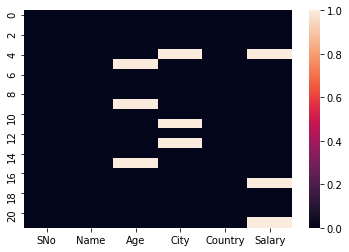

In [5]:
sns.heatmap(df.isnull())

How much null value in a particular column

In [6]:
df.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [7]:
df.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
SNo        22 non-null int64
Name       22 non-null object
Age        19 non-null float64
City       19 non-null object
Country    22 non-null object
Salary     19 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ KB


In [9]:
df["Country"].unique()

array(['Canada', 'Asia', 'America', 'Africa', 'Europe'], dtype=object)

In [10]:
df["City"].unique()

array(['Toronto', 'Edmonto', 'HongKong', nan, 'BayArea', 'Hyderabad',
       'newyork', 'Congo', 'Angola', 'Finland', 'London'], dtype=object)

Droping column which are not esential for model

In [11]:
df.drop(["Name"],axis=1,inplace=True)

In [12]:
df.drop(["SNo"],axis=1,inplace=True)

In [13]:
df.head()

,Age,City,Country,Salary
0,28.0,Toronto,Canada,20000.0
1,31.0,Edmonto,Canada,3900.0
2,34.0,Toronto,Canada,8000.0
3,26.0,HongKong,Asia,66672.0
4,30.0,NaN,America,NaN


Imputting Missing values

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

In [16]:
df['City'].fillna(method ='ffill',inplace=True)

checking null values are filled or not

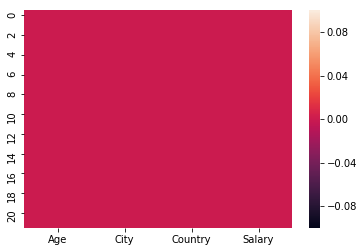

In [17]:
sns.heatmap(df.isnull())

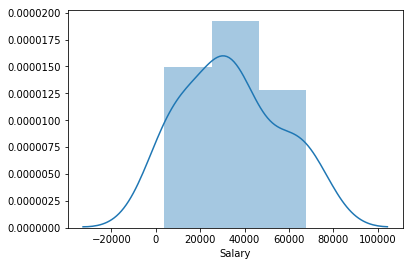

In [18]:
sns.distplot(df['Salary'])

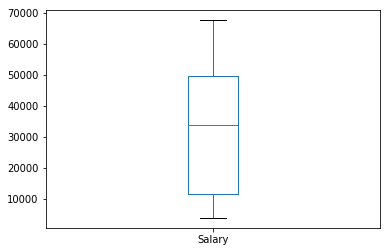

In [19]:
df['Salary'].plot.box()

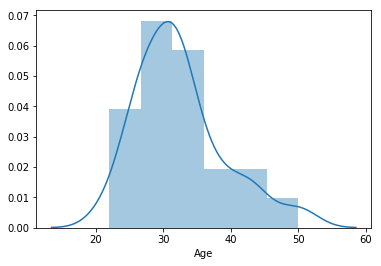

In [20]:
sns.distplot(df['Age'])

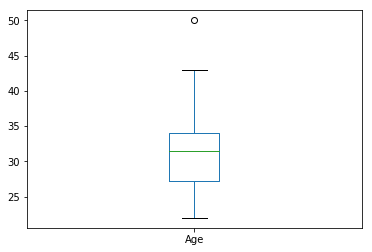

In [21]:
df['Age'].plot.box()

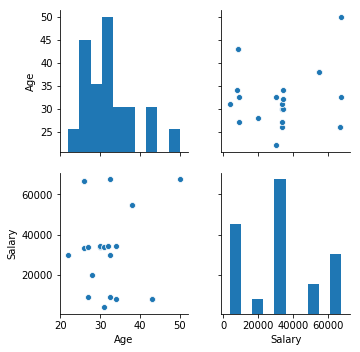

In [22]:
sns.pairplot(df)

There is no good linear relationship

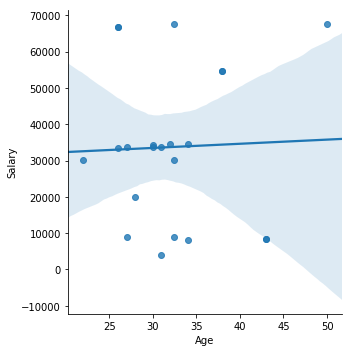

In [23]:
sns.lmplot(x='Age',y='Salary',data=df)

In Asia pepole has highest salary as compared to other country

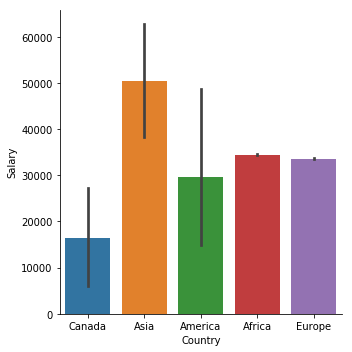

In [24]:
sns.catplot(x='Country',y='Salary',data=df,kind='bar')

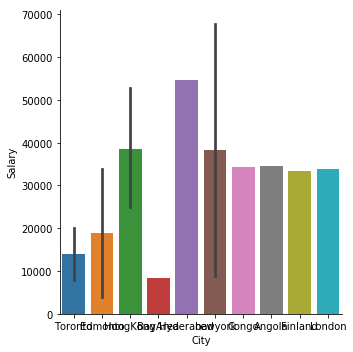

In [25]:
sns.catplot(x='City',y='Salary',data=df,kind='bar')

Tranforming categorical features into numeric values.

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [27]:
df['Country']=le.fit_transform(df['Country'])

In [28]:
df.head()

,Age,City,Country,Salary
0,28.0,8,3,20000.000000
1,31.0,3,3,3900.000000
2,34.0,8,3,8000.000000
3,26.0,5,2,66672.000000
4,30.0,5,1,33739.947368


In [29]:
x=df.iloc[:,:-1]
x.head()

,Age,City,Country
0,28.0,8,3
1,31.0,3,3
2,34.0,8,3
3,26.0,5,2
4,30.0,5,1


In [30]:
from sklearn.preprocessing import StandardScaler
mi=StandardScaler()
x=mi.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [31]:
y=df.iloc[:,-1]
y.head()

0    20000.000000
1     3900.000000
2     8000.000000
3    66672.000000
4    33739.947368
Name: Salary, dtype: float64

In [32]:
import sklearn
from sklearn.model_selection import train_test_split

Split the data

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=118)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17, 3)
(17,)
(5, 3)
(5,)


Applying LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [36]:
lm=LinearRegression(normalize=True)
lm.fit(x_train,y_train)
lm.coef_
lm.intercept_
pre=lm.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pre))
print('MSE = ',mean_squared_error(y_test,pre))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pre)))
print('R2_score = ',r2_score(y_test,pre))
print('Training_score = ',lm.score(x_train,y_train))

MAE =  23714.438171550428
MSE =  690142045.6384894
RMSE =  26270.554726508715
R2_score =  -0.6228223130958963
Training_score =  0.134419159597579


Applying Lasso

In [37]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(x_train,y_train)
pred=la.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',la.score(x_train,y_train))

MAE =  23712.700327168306
MSE =  690037748.2334435
RMSE =  26268.56958864421
R2_score =  -0.622577064806539
Training_score =  0.13441914712767


Applying KNeighborsRegressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',la.score(x_train,y_train))

MAE =  25636.13052631579
MSE =  736964508.1020277
RMSE =  27147.090232693958
R2_score =  -0.7329221647425637
Training_score =  0.13441914712767


Applying DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE = ',mean_absolute_error(y_test,pred))
print('MSE = ',mean_squared_error(y_test,pred))
print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))
print('R2_score = ',r2_score(y_test,pred))
print('Training_score = ',dtr.score(x_train,y_train))

MAE =  33414.41052631578
MSE =  1615962010.7163434
RMSE =  40199.02997233072
R2_score =  -2.7998253036150613
Training_score =  0.7104228895514297
